In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chocolate-sales/Chocolate Sales.csv


# Proposta do Caso
A proposta principal do projeto é simular um analista de dados de uma empresa de vendas exportadora de chocolates e por meio de uma análise exploratória cobrir os seguintes dados:
* Qual é o comportamento dos consumidores
  1. Por meio dos dados saber quais os produtos mais vendidos a fim de pedir características sobre esses produtos específicos para vermos possíveis preferencias dos consumidores 
* Os Melhores vendedores
  1. Analisar os Melhores
  2. Analisar os Piores
  3. Analisar o Ticket Médio dos vendedores, medida essa muito usada para ver se um vendedor vende produtos de maior valor agregado ou não
* Os Produtos Mais Rentaveis
  1. Os 7 produtos mais rentaveis
  2. Os 7 produtos menos rentaveis
  3. O Ticket Médio por produto
* Analisar as vendas durante o tempo (Esta parte majoritariamente foi feita no Plotly, contudo o Kaggle acaba não renderizando, logo sugiro rodar o mesmo no VSCode ou similar) 
  1. Analisar as vendas totais mês a mês
  2. Analisar as vendas totais dia a dia
  3. Analisar as vendas Mês a Mês por País

In [2]:
#Importando o DataFrame
df = pd.read_csv("/kaggle/input/chocolate-sales/Chocolate Sales.csv",delimiter=",")

In [3]:
#Importanto os pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
#Visualizando as caracteristicas das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [5]:
#Ajeitando algumas variaveis
df['amount_float']=df['Amount'].str.replace(r'[^\d]','',regex=True)
df['amount_float']=df['amount_float'].str.replace(',','')
df['amount_float']=df['amount_float'].astype(float)
print(df[['Amount','amount_float']].head())

     Amount  amount_float
0   $5,320         5320.0
1   $7,896         7896.0
2   $4,501         4501.0
3  $12,726        12726.0
4  $13,685        13685.0


# Analise de Vendas por País de Destino
* Entender qual país gera a maior receita e maior volume exportado
* Entender quais países possuem o maior ticket médio

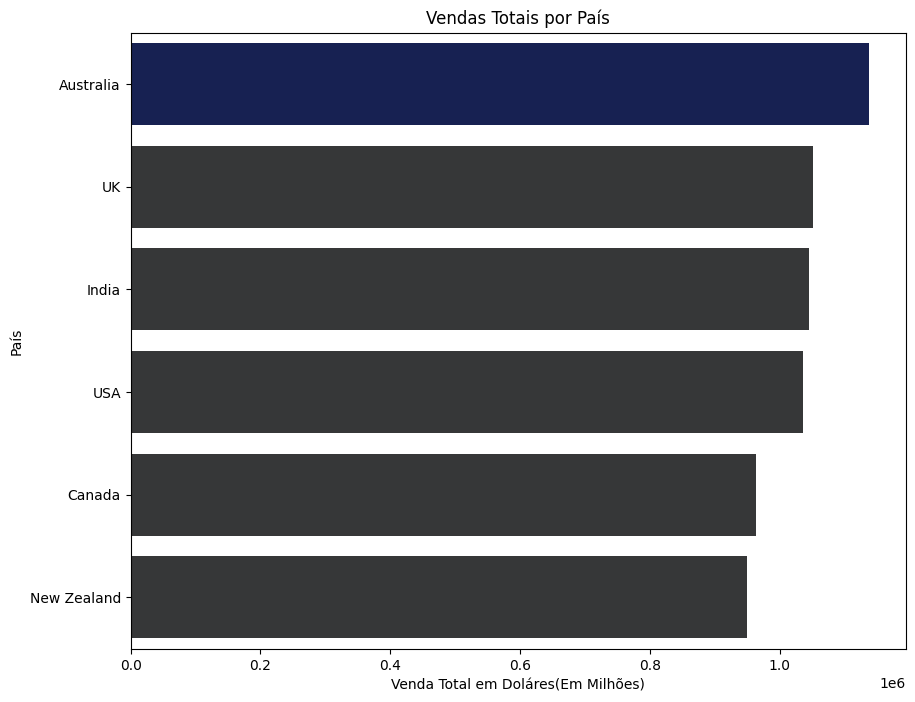

In [6]:
#Analisando vendas por País
#Alterando os dados para numerico
tabela_pais=df.groupby('Country')['amount_float'].sum().reset_index()
tabela_pais=tabela_pais.sort_values('amount_float',ascending=False)
#Criação de um data frame COR para visualização mais clara
Cor=['#0d1a5c','#363738','#363738','#363738','#363738','#363738','#363738']
#Criação do Gráfico

plt.figure(figsize=(10,8))
sns.barplot(data=tabela_pais,
           x="amount_float",
           y="Country",
           orient='h',palette=Cor)

plt.title("Vendas Totais por País")
plt.xlabel("Venda Total em Doláres(Em Milhões)")
plt.ylabel("País")
plt.show()

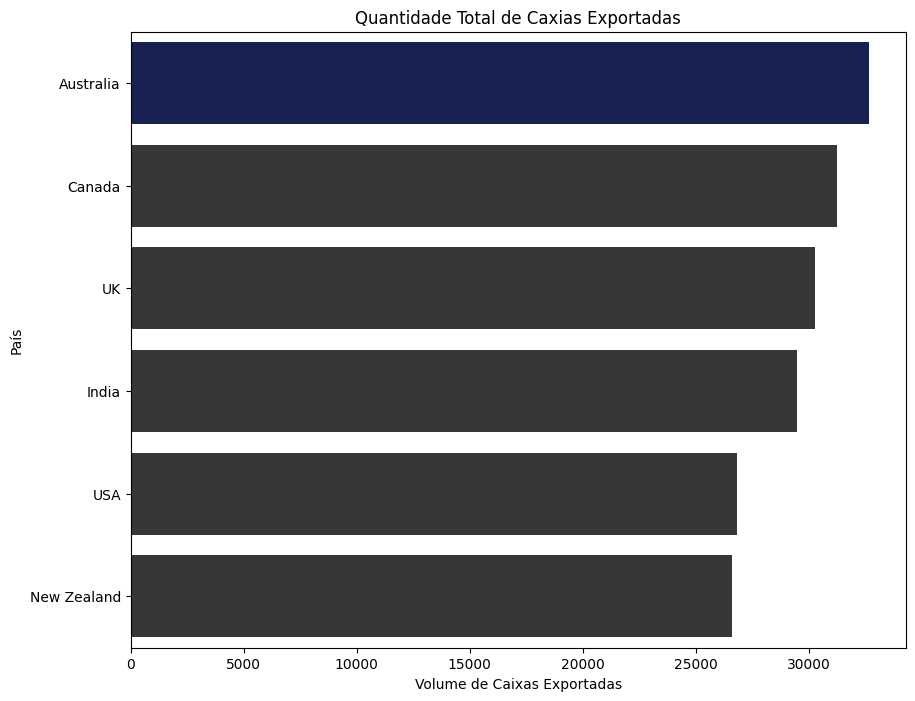

In [7]:
#Analisando Expotação para País
tabela_pais_expor=df.groupby('Country')['Boxes Shipped'].sum().reset_index()
tabela_pais_expor=tabela_pais_expor.sort_values('Boxes Shipped',ascending=False)
#Criação de um data frame COR para visualização mais clara
Cor=['#0d1a5c','#363738','#363738','#363738','#363738','#363738','#363738']
#Criação do Gráfico

plt.figure(figsize=(10,8))
sns.barplot(data=tabela_pais_expor,
           x="Boxes Shipped",
           y="Country",
           orient='h',palette=Cor)

plt.title("Quantidade Total de Caxias Exportadas")
plt.xlabel("Volume de Caixas Exportadas")
plt.ylabel("País")
plt.show()

**Nota-se que Australia continua sendo o país com mais caixas exportadas, contudo Canada que ocupava a penultima colocação em receita total é o segundo maior país em quantidade de caixas exportadas, isso pode nos dar a ideia que o seu ticket médio para exportação é baixo**
* Para validarmos isso, podemos fazer uma tabela com a relação entre receita total/quantidade de caixas exportadas

In [8]:
# Criando o ticket médio por caixa exportada
tabela_ticketmedio= pd.merge(
    tabela_pais,
    tabela_pais_expor,
    on='Country',
    how='inner'
)
tabela_ticketmedio['Valor_por_Caixa']= tabela_ticketmedio['amount_float']/tabela_ticketmedio['Boxes Shipped']
tabela_ticketmedio=tabela_ticketmedio.sort_values('Valor_por_Caixa',ascending=False)
print(tabela_ticketmedio[['Country','Valor_por_Caixa']])

       Country  Valor_por_Caixa
3          USA        38.597860
5  New Zealand        35.756885
2        India        35.486936
0    Australia        34.838331
1           UK        34.752751
4       Canada        30.841389


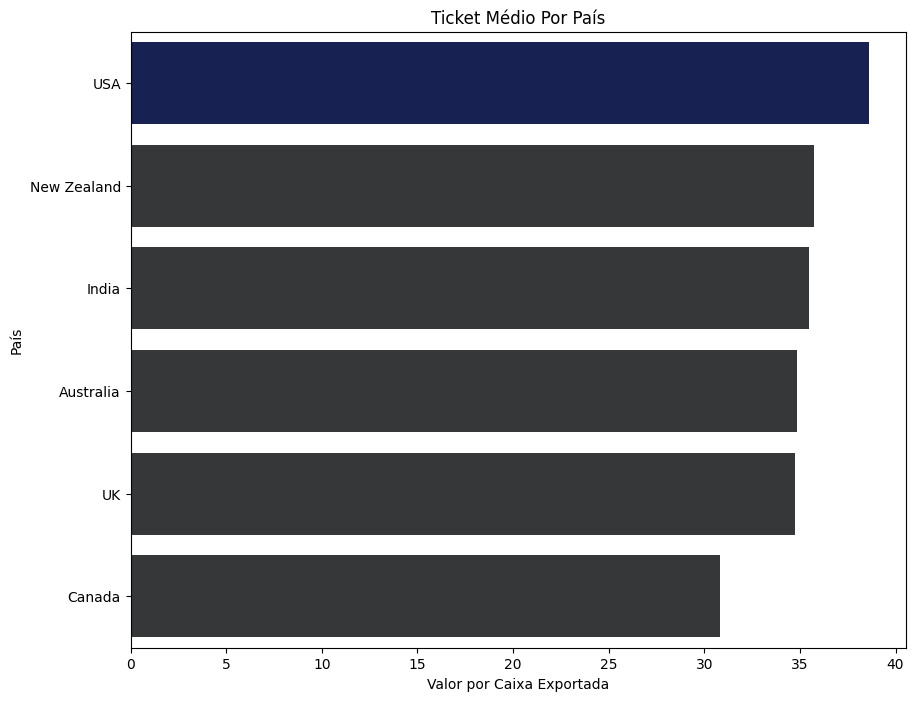

In [9]:
#Criando um Gráfico para a tabela acima
Cor=['#0d1a5c','#363738','#363738','#363738','#363738','#363738','#363738']
plt.figure(figsize=(10,8))
sns.barplot(data=tabela_ticketmedio,
           x="Valor_por_Caixa",
           y="Country",
           orient='h',palette=Cor)

plt.title("Ticket Médio Por País")
plt.xlabel("Valor por Caixa Exportada")
plt.ylabel("País")
plt.show()

## Conclusões acerca dos países
* Australía é o país que gera mais receita, bem como possui um alto ticket médio
* Os Estados Unidos são um país que apesar do baixo numero de caixas exportadas é o que gera mais retorno por caixa exportada ao país, sendo o líder em ticket médio destoando até mesmo dos outros países 
* Canada é o país com pior desempenho em relação a ticket médio, podendo ser exploradas oportunidades para gerar um incremento no ticket médio do país, e trazer o seu ticket que está atualmente em 30.84 para um valor mais proximo de 35
* Nova Zelandia se mostra um país que importa produtos com ticket médio ligeramente mais alto que os outros, ficando em segundo, contudo o país tem uma baixa receita para a empresa

In [10]:
df['Sales Person'].value_counts()

Sales Person
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Dennison Crosswaite    49
Oby Sorrel             49
Ches Bonnell           48
Karlen McCaffrey       47
Gigi Bohling           47
Curtice Advani         46
Kaine Padly            45
Madelene Upcott        45
Marney O'Breen         45
Barr Faughny           43
Jehu Rudeforth         43
Roddy Speechley        43
Gunar Cockshoot        43
Mallorie Waber         41
Jan Morforth           39
Andria Kimpton         39
Husein Augar           38
Dotty Strutley         36
Wilone O'Kielt         34
Rafaelita Blaksland    34
Camilla Castle         32
Name: count, dtype: int64

In [11]:
#Criando uma tabela com as vendas por vendedor
tabela_vendedores=df.groupby('Sales Person')['amount_float'].sum().reset_index()
tabela_vendedores=tabela_vendedores.sort_values('amount_float',ascending=False)
print(tabela_vendedores)

           Sales Person  amount_float
5          Ches Bonnell      320901.0
20           Oby Sorrel      316645.0
17      Madelene Upcott      316099.0
3           Brien Boise      312816.0
16        Kelci Walkden      311710.0
23          Van Tuxwell      303149.0
7   Dennison Crosswaite      291669.0
2        Beverie Moffet      278922.0
14          Kaine Padly      266490.0
19       Marney O'Breen      259742.0
1          Barr Faughny      258713.0
22      Roddy Speechley      251062.0
10      Gunar Cockshoot      238483.0
9          Gigi Bohling      232666.0
15     Karlen McCaffrey      223895.0
13       Jehu Rudeforth      220976.0
12         Jan Morforth      219667.0
6        Curtice Advani      216461.0
21  Rafaelita Blaksland      210245.0
11         Husein Augar      205212.0
0        Andria Kimpton      201747.0
18       Mallorie Waber      200592.0
4        Camilla Castle      196616.0
8        Dotty Strutley      190624.0
24       Wilone O'Kielt      138523.0


In [12]:
#Criando tabela com os 7 melhores vendedores ( Em Receita Acumulada)
tabela_vendedores_maiores = tabela_vendedores[['Sales Person','amount_float']].nlargest(7,'amount_float')
print(tabela_vendedores_maiores)
# Criando tabela com os 7 piores vendedores ( Em Receita Acumulada)
tabela_vendedores_menores = tabela_vendedores[['Sales Person','amount_float']].nsmallest(7,'amount_float')
print(tabela_vendedores_menores)

           Sales Person  amount_float
5          Ches Bonnell      320901.0
20           Oby Sorrel      316645.0
17      Madelene Upcott      316099.0
3           Brien Boise      312816.0
16        Kelci Walkden      311710.0
23          Van Tuxwell      303149.0
7   Dennison Crosswaite      291669.0
           Sales Person  amount_float
24       Wilone O'Kielt      138523.0
8        Dotty Strutley      190624.0
4        Camilla Castle      196616.0
18       Mallorie Waber      200592.0
0        Andria Kimpton      201747.0
11         Husein Augar      205212.0
21  Rafaelita Blaksland      210245.0


Contudo vamos descobrir qual é a média de receita por vendedor, assim poderemos saber o quão bem os melhores estão desempenhando e o grau ruim que outros estão

# Analise de Vendas por Vendedores
* Quais são os melhores e piores vendedores
* Quais tem os maiores tickets médios

In [13]:
#Sabendo a média por vendedor
mediavendedores=tabela_vendedores['amount_float'].mean()
print(mediavendedores)

247345.0


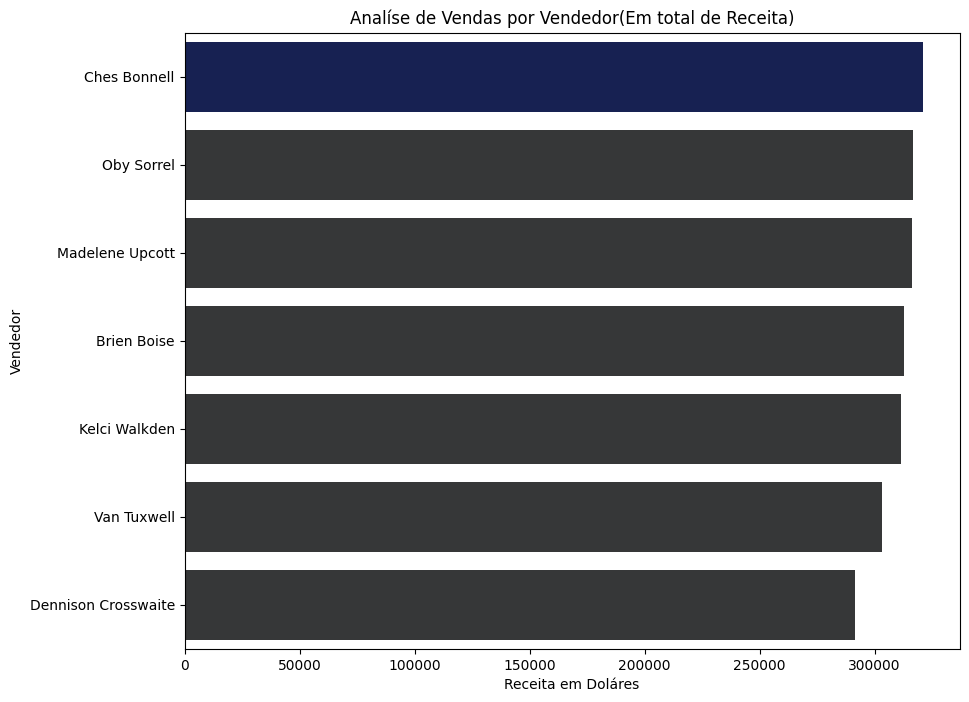

In [14]:
#Gráfico dos melhores vendedores
Cor2=['#0d1a5c','#363738','#363738','#363738','#363738','#363738','#363738']
plt.figure(figsize=(10,8))
sns.barplot(data=tabela_vendedores_maiores,
           x="amount_float",
           y="Sales Person",
           orient='h',palette=Cor)

plt.title("Analíse de Vendas por Vendedor(Em total de Receita)")
plt.xlabel("Receita em Doláres")
plt.ylabel("Vendedor")
plt.show()

## Os 7 Melhores Vendedores
* Vemos que os 7 melhores vendedores em receita tem receitas bem proximas uma dos outros, dessa forma entre eles não distoando nenhum.
* O melhor vendedor em receita é Chess Bonnell

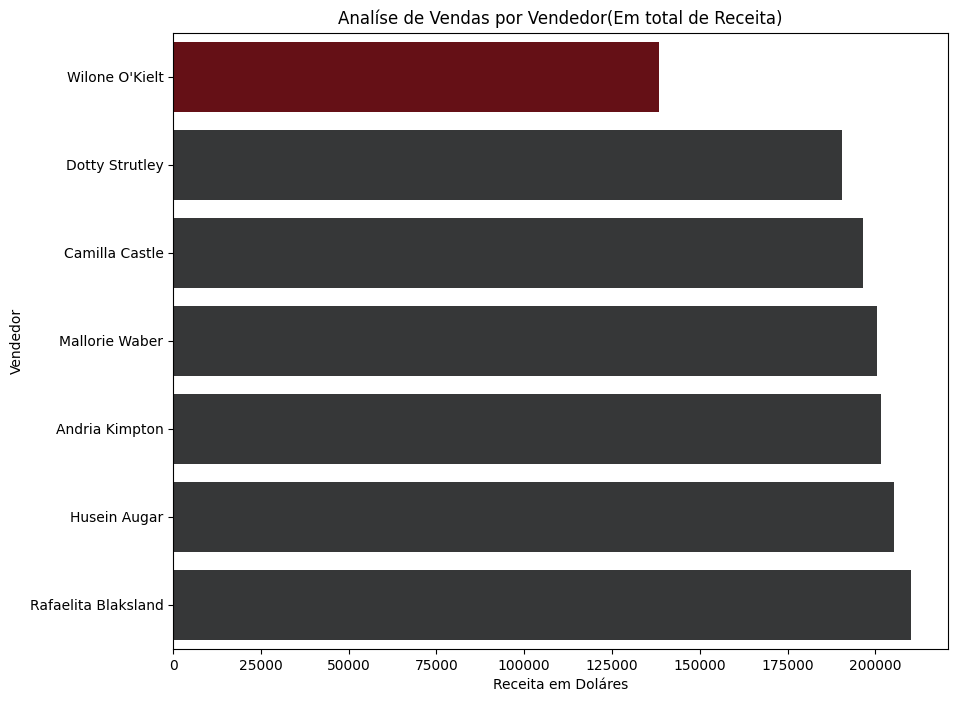

In [15]:
#Gráfico dos piores vendedores
Cor2=['#73020a','#363738','#363738','#363738','#363738','#363738','#363738']
plt.figure(figsize=(10,8))
sns.barplot(data=tabela_vendedores_menores,
           x="amount_float",
           y="Sales Person",
           orient='h',palette=Cor2)

plt.title("Analíse de Vendas por Vendedor(Em total de Receita)")
plt.xlabel("Receita em Doláres")
plt.ylabel("Vendedor")
plt.show()

## Os 7 Piores Vendedores
* Nesta caso já temos um vendedor que distoa dos outros, com Wilone O'Kielt sendo o pior vendedor em quesitos de receita, bem como distoando dos outros.
* Ao menos 4 vendedores possuem receitas inferiores a 200 mil doláres

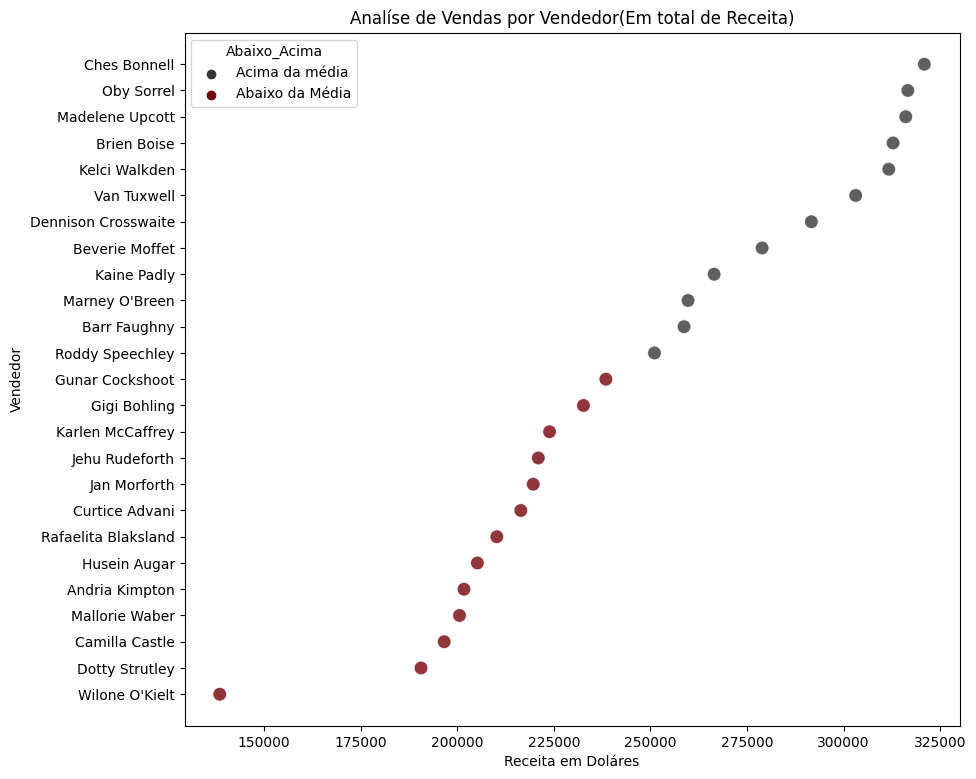

In [16]:
#Criando Gráfico de Dispersão com todos os Vendedores
#Criando coluna para classificação acima e abaixo da média
tabela_vendedores['Abaixo_Acima']=np.where(tabela_vendedores['amount_float']>=mediavendedores,'Acima da média','Abaixo da Média')
#Configurando Gráfico
plt.figure(figsize=(10,9))
scatter = sns.scatterplot(
    data=tabela_vendedores,
    x='amount_float',
    y='Sales Person',
    hue='Abaixo_Acima',
    palette={'Acima da média':'#363738','Abaixo da Média':'#73020a'},
    s=100,
     alpha=0.8
)
plt.title("Analíse de Vendas por Vendedor(Em total de Receita)")
plt.xlabel("Receita em Doláres")
plt.ylabel("Vendedor")
plt.show()

* Dessa forma, vemos que 12 vendedores estão acima da média e 13 abaixo, bem como vemos que há pouca variancia nos dados, com apenas Wilone O'Kielt destoando

In [17]:
tabela_export_vendedores = df.groupby('Sales Person')['Boxes Shipped'].sum().reset_index()
tabela_export_vendedores= tabela_export_vendedores.sort_values('Boxes Shipped',ascending=False)
print(tabela_export_vendedores)

           Sales Person  Boxes Shipped
15     Karlen McCaffrey           9658
2        Beverie Moffet           9214
7   Dennison Crosswaite           8767
16        Kelci Walkden           8702
20           Oby Sorrel           8608
3           Brien Boise           8102
19       Marney O'Breen           8043
12         Jan Morforth           7661
5          Ches Bonnell           7522
17      Madelene Upcott           7279
14          Kaine Padly           7253
13       Jehu Rudeforth           7246
6        Curtice Advani           7074
22      Roddy Speechley           6899
8        Dotty Strutley           6853
23          Van Tuxwell           6799
10      Gunar Cockshoot           6677
0        Andria Kimpton           6448
1          Barr Faughny           6366
9          Gigi Bohling           6303
18       Mallorie Waber           5980
11         Husein Augar           5849
4        Camilla Castle           5374
21  Rafaelita Blaksland           4297
24       Wilone O'Kielt  

In [18]:
print(tabela_vendedores)

           Sales Person  amount_float     Abaixo_Acima
5          Ches Bonnell      320901.0   Acima da média
20           Oby Sorrel      316645.0   Acima da média
17      Madelene Upcott      316099.0   Acima da média
3           Brien Boise      312816.0   Acima da média
16        Kelci Walkden      311710.0   Acima da média
23          Van Tuxwell      303149.0   Acima da média
7   Dennison Crosswaite      291669.0   Acima da média
2        Beverie Moffet      278922.0   Acima da média
14          Kaine Padly      266490.0   Acima da média
19       Marney O'Breen      259742.0   Acima da média
1          Barr Faughny      258713.0   Acima da média
22      Roddy Speechley      251062.0   Acima da média
10      Gunar Cockshoot      238483.0  Abaixo da Média
9          Gigi Bohling      232666.0  Abaixo da Média
15     Karlen McCaffrey      223895.0  Abaixo da Média
13       Jehu Rudeforth      220976.0  Abaixo da Média
12         Jan Morforth      219667.0  Abaixo da Média
6        C

In [19]:
# Juntando as informações de vendas em receita e volume em somente uma tabela
tabela_ticketmedio_vendedor= pd.merge(
    tabela_vendedores,
    tabela_export_vendedores,
    on='Sales Person',
    how='inner'
)
print(tabela_ticketmedio_vendedor)

           Sales Person  amount_float     Abaixo_Acima  Boxes Shipped
0          Ches Bonnell      320901.0   Acima da média           7522
1            Oby Sorrel      316645.0   Acima da média           8608
2       Madelene Upcott      316099.0   Acima da média           7279
3           Brien Boise      312816.0   Acima da média           8102
4         Kelci Walkden      311710.0   Acima da média           8702
5           Van Tuxwell      303149.0   Acima da média           6799
6   Dennison Crosswaite      291669.0   Acima da média           8767
7        Beverie Moffet      278922.0   Acima da média           9214
8           Kaine Padly      266490.0   Acima da média           7253
9        Marney O'Breen      259742.0   Acima da média           8043
10         Barr Faughny      258713.0   Acima da média           6366
11      Roddy Speechley      251062.0   Acima da média           6899
12      Gunar Cockshoot      238483.0  Abaixo da Média           6677
13         Gigi Bohl

In [20]:
#Analise dos tickets médios por vendedor
tabela_ticketmedio_vendedor['Valor_por_Caixa']= tabela_ticketmedio_vendedor['amount_float']/tabela_ticketmedio_vendedor['Boxes Shipped']
tabela_ticketmedio_vendedor=tabela_ticketmedio_vendedor.sort_values('Valor_por_Caixa',ascending=False)
print(tabela_ticketmedio_vendedor)

           Sales Person  amount_float     Abaixo_Acima  Boxes Shipped  \
18  Rafaelita Blaksland      210245.0  Abaixo da Média           4297   
5           Van Tuxwell      303149.0   Acima da média           6799   
2       Madelene Upcott      316099.0   Acima da média           7279   
0          Ches Bonnell      320901.0   Acima da média           7522   
10         Barr Faughny      258713.0   Acima da média           6366   
3           Brien Boise      312816.0   Acima da média           8102   
13         Gigi Bohling      232666.0  Abaixo da Média           6303   
1            Oby Sorrel      316645.0   Acima da média           8608   
8           Kaine Padly      266490.0   Acima da média           7253   
22       Camilla Castle      196616.0  Abaixo da Média           5374   
11      Roddy Speechley      251062.0   Acima da média           6899   
4         Kelci Walkden      311710.0   Acima da média           8702   
12      Gunar Cockshoot      238483.0  Abaixo da Mé

In [21]:
# Calculo do ticket médio por vendedor
media_ticketmedio_vendedor=tabela_ticketmedio_vendedor['Valor_por_Caixa'].mean()
print(media_ticketmedio_vendedor)

35.38702072562907


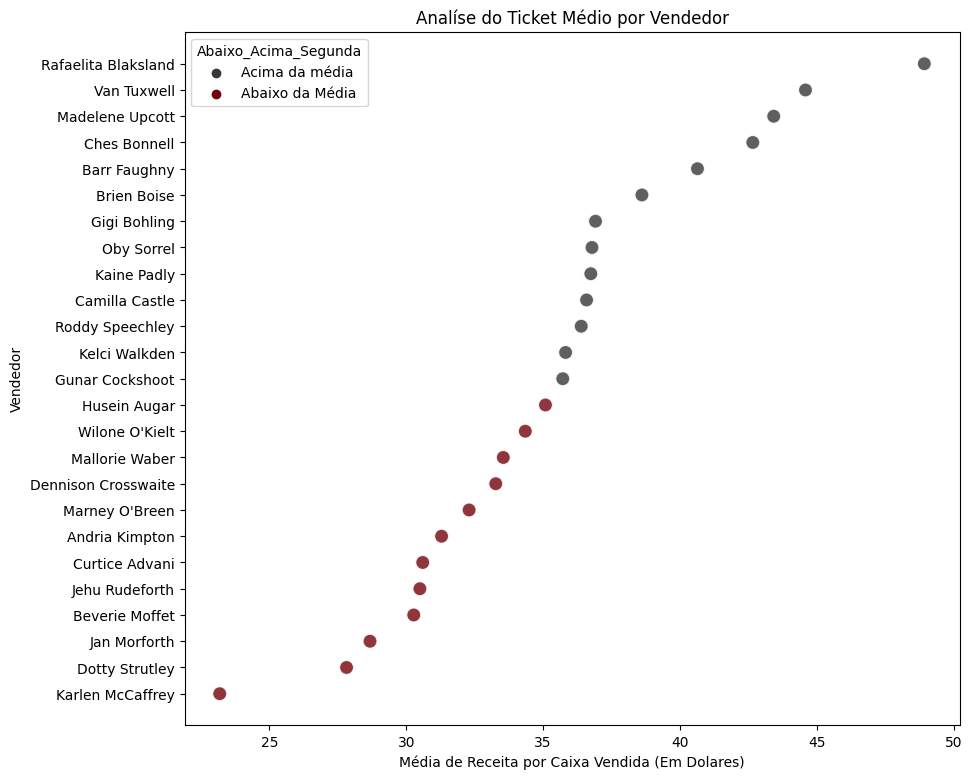

In [22]:
#Criando Gráfico de Dispersão com todos os Vendedores
#Criando coluna para classificação acima e abaixo da média
tabela_ticketmedio_vendedor['Abaixo_Acima_Segunda']=np.where(tabela_ticketmedio_vendedor['Valor_por_Caixa']>=media_ticketmedio_vendedor,
                                                             'Acima da média','Abaixo da Média')
#Configurando Gráfico
plt.figure(figsize=(10,9))
scatter = sns.scatterplot(
    data=tabela_ticketmedio_vendedor,
    x='Valor_por_Caixa',
    y='Sales Person',
    hue='Abaixo_Acima_Segunda',
    palette={'Acima da média':'#363738','Abaixo da Média':'#73020a'},
    s=100,
     alpha=0.8
)
plt.title("Analíse do Ticket Médio por Vendedor")
plt.xlabel("Média de Receita por Caixa Vendida (Em Dolares)")
plt.ylabel("Vendedor")
plt.show()

## Conclusões acerca do ticket médio por vendedor
* O fato mais evidente é o vendedor Rafaelite Blaksland ter um ticket médio extremamente distoante, o mesmo contudo é um dos piores para agregar receita total, sendo assim fica evidente que o mesmo está focando em vender produtos mais caros mas em quantidade menores, o que faz com que o mesmo tenha um ticket médio alto, dessa forma esse vendedor pode ser focalizado para tentar vender produtos mais caros, mas também pode ser treinado e estimulado para aumentar as vendas por caixas.
* Outro fator dos melhores vendedores por ticket médio é o fato de os 4 primeiros possuirem tickets médio maiores que 40 doláres por caixa, o que faz eles ficarem bastante acima da média de 35 doláres por caixa.
* Um ponto de atenção é a vendedora Karlen McCaffrey que possui um ticket médio na ordem de 23 doláres a caixa indicando um baixo desempenho da mesma e destoando negativamente dos outros vendedores, talvez seja o caso de avaliar o motivo pelo qual ela não consegue gerar um valor maior por caixa vendido, uma vez que a mesma tem um desempenho aceitavel na captação de receita total estando proxima da média, com isso podemos inferir que o problema está na agragação de valor ou talvez no preço dos produtos que a mesma tem como foco
* No mais nenhum outro fator muito relevante se mostra nessa analise, com os vendedores com menores receitas sendo os com menores tickets médio, bem como o inverso é verdadeiro. Desse modo, sendo algo esperado.

# Analise dos Produtos
* Analise dos produtos mais e menos rentaveis
* Analise do Ticket Médio dos produtos
* Analise dos produtos mais populares em cada país

In [23]:
#Receita totais por Produtos
rentabilidade_produtos = df.groupby('Product')['amount_float'].sum().reset_index()
rentabilidade_produtos = rentabilidade_produtos.sort_values('amount_float',ascending=False)
print(rentabilidade_produtos)

                 Product  amount_float
19    Smooth Sliky Salty      349692.0
0         50% Dark Bites      341712.0
21            White Choc      329147.0
17   Peanut Butter Cubes      324842.0
10               Eclairs      312445.0
3        99% Dark & Pure      299796.0
2          85% Dark Bars      299229.0
16   Organic Choco Syrup      294700.0
20   Spicy Special Slims      293454.0
14       Mint Chip Choco      283969.0
5           Almond Choco      277536.0
12    Manuka Honey Choco      275541.0
13             Milk Bars      269248.0
18       Raspberry Choco      264740.0
4            After Nines      261331.0
11      Fruit & Nut Bars      259147.0
9          Drinking Coco      256655.0
15          Orange Choco      256144.0
6    Baker's Choco Chips      249613.0
8   Choco Coated Almonds      241486.0
7   Caramel Stuffed Bars      231588.0
1         70% Dark Bites      211610.0


In [24]:
#Criando tabela com os 7 produtos mais rentaveis
tabela_maiores_produtos = rentabilidade_produtos[['Product','amount_float']].nlargest(7,'amount_float')
print(tabela_maiores_produtos)
#Criando tabela com os 7 produtos menos rentaveis
tabela_menores_produtos = rentabilidade_produtos[['Product','amount_float']].nsmallest(7,'amount_float')
print(tabela_menores_produtos)

                Product  amount_float
19   Smooth Sliky Salty      349692.0
0        50% Dark Bites      341712.0
21           White Choc      329147.0
17  Peanut Butter Cubes      324842.0
10              Eclairs      312445.0
3       99% Dark & Pure      299796.0
2         85% Dark Bars      299229.0
                 Product  amount_float
1         70% Dark Bites      211610.0
7   Caramel Stuffed Bars      231588.0
8   Choco Coated Almonds      241486.0
6    Baker's Choco Chips      249613.0
15          Orange Choco      256144.0
9          Drinking Coco      256655.0
11      Fruit & Nut Bars      259147.0


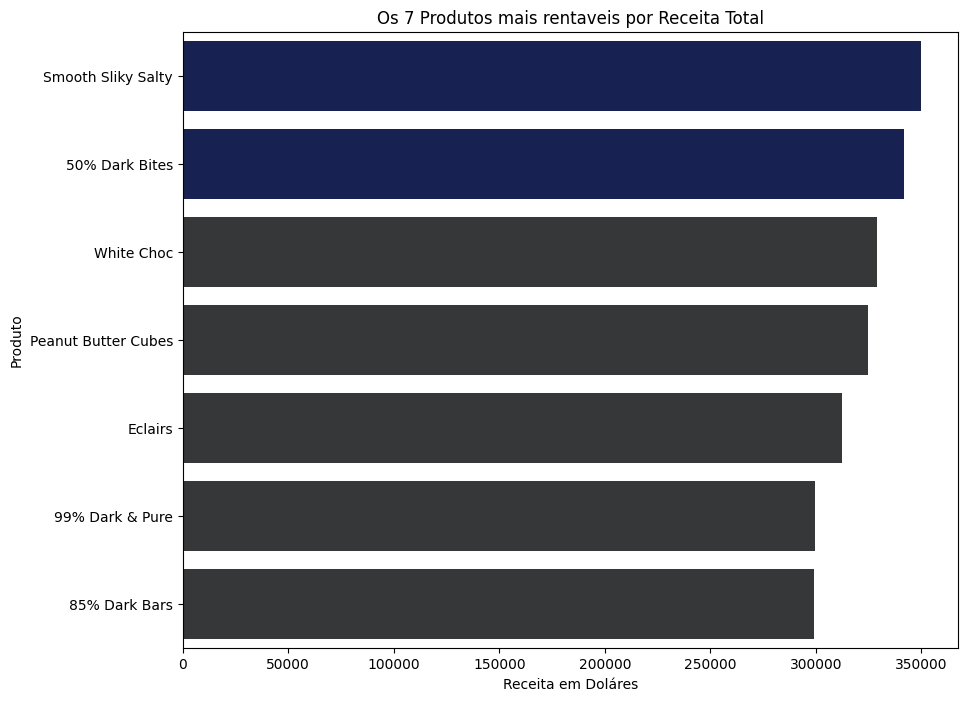

In [25]:
#Gráfico com os produtos com maiores receitas
#Gráfico dos melhores vendedores
Cor=['#0d1a5c','#0d1a5c','#363738','#363738','#363738','#363738','#363738']
plt.figure(figsize=(10,8))
sns.barplot(data=tabela_maiores_produtos,
           x="amount_float",
           y="Product",
           orient='h',palette=Cor)

plt.title("Os 7 Produtos mais rentaveis por Receita Total")
plt.xlabel("Receita em Doláres")
plt.ylabel("Produto")
plt.show()

## 7 Chocolates mais rentaveis
* São chocolates mais consolidados com alta demanda no mercado a exemplo do líder em receita sendo um chocolate Macio levemente salgado
* Chocolates amargos, ou seja aqueles maiores que 50% também se destacam no gráfico acima.
* Bem como o chocolate branco também tem grande popularidade

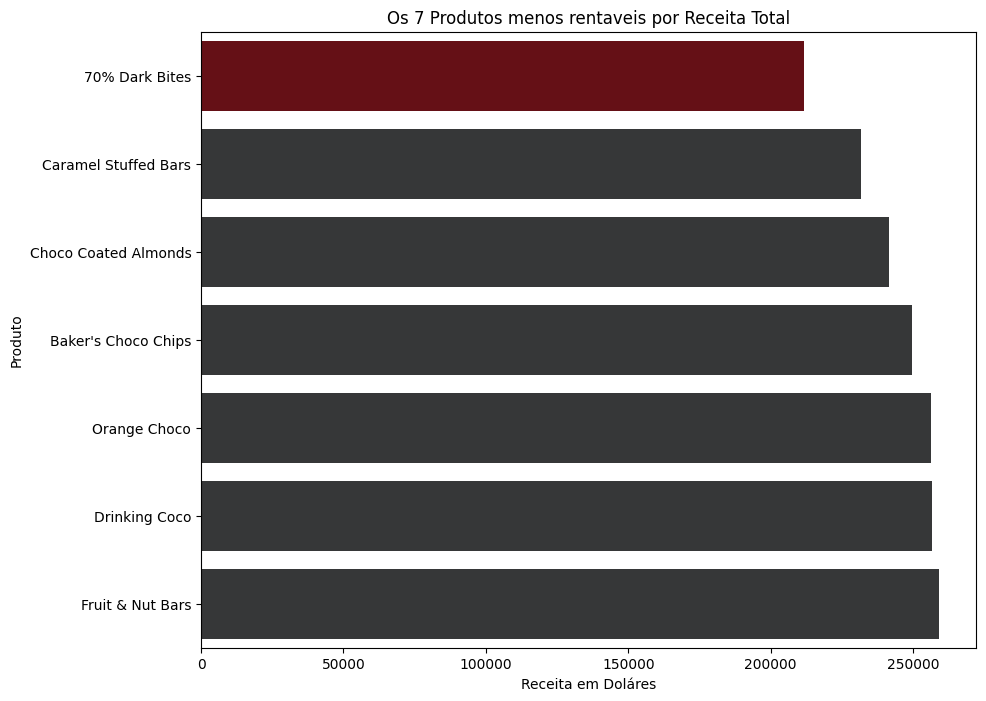

In [26]:
#Gráfico com os produtos com menores receitas
plt.figure(figsize=(10,8))
sns.barplot(data=tabela_menores_produtos,
           x="amount_float",
           y="Product",
           orient='h',palette=Cor2)

plt.title("Os 7 Produtos menos rentaveis por Receita Total")
plt.xlabel("Receita em Doláres")
plt.ylabel("Produto")
plt.show()

## 7 Chocolates Menos Rentaveis
* Estranhamento vemos que o chocolate amargo 70% em forma de Bites tem tido uma receita abaixo se comparado com os outros chocolates com ao menos 50% de Cacau
* Bem como vemos que as menores receitas foram dispostas por chocolates com sabores menos universais o que se é esperado, além disso devemos ver quais são os países que os mesmos tem maiores demandas futuramente

In [27]:
#Calculando a media da receita total dos produtos
mediaprodutos = rentabilidade_produtos['amount_float'].mean()
print(mediaprodutos)

281073.86363636365


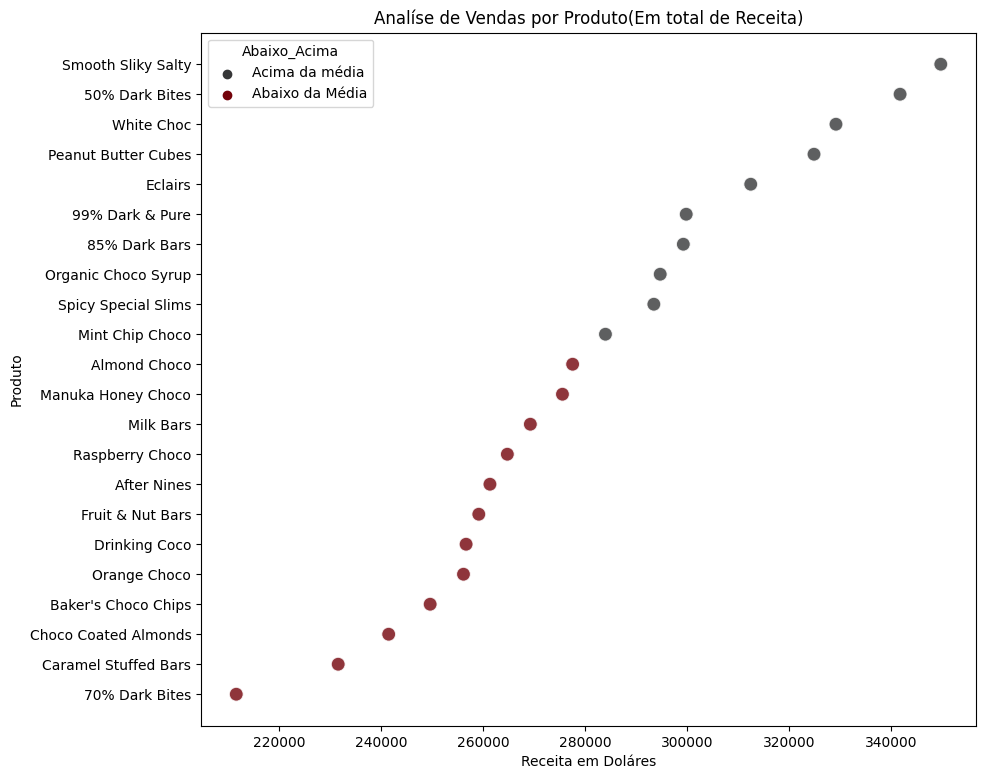

In [28]:
#Criando Gráfico de Dispersão com todos os Produtos
#Criando coluna para classificação acima e abaixo da média
rentabilidade_produtos['Abaixo_Acima']=np.where(rentabilidade_produtos['amount_float']>=mediaprodutos,'Acima da média','Abaixo da Média')
#Configurando Gráfico
plt.figure(figsize=(10,9))
scatter = sns.scatterplot(
    data=rentabilidade_produtos,
    x='amount_float',
    y='Product',
    hue='Abaixo_Acima',
    palette={'Acima da média':'#363738','Abaixo da Média':'#73020a'},
    s=100,
     alpha=0.8
)
plt.title("Analíse de Vendas por Produto(Em total de Receita)")
plt.xlabel("Receita em Doláres")
plt.ylabel("Produto")
plt.show()

In [29]:
# Criando a Tabela de Exportações
tabela_export_produtos = df.groupby('Product')['Boxes Shipped'].sum().reset_index()
tabela_export_produtos = tabela_export_produtos.sort_values('Boxes Shipped',ascending=False)
# Jutando em uma tabela de Ticket Médio por Produto
ticketmedio_produto = pd.merge(
    rentabilidade_produtos,
    tabela_export_produtos,
    how = 'inner',
    on='Product'
)
# Criando coluna com o ticket médio
ticketmedio_produto['Valor_por_Caixa'] = ticketmedio_produto['amount_float']/ticketmedio_produto['Boxes Shipped']
ticketmedio_produto = ticketmedio_produto.sort_values('Valor_por_Caixa',ascending=False)

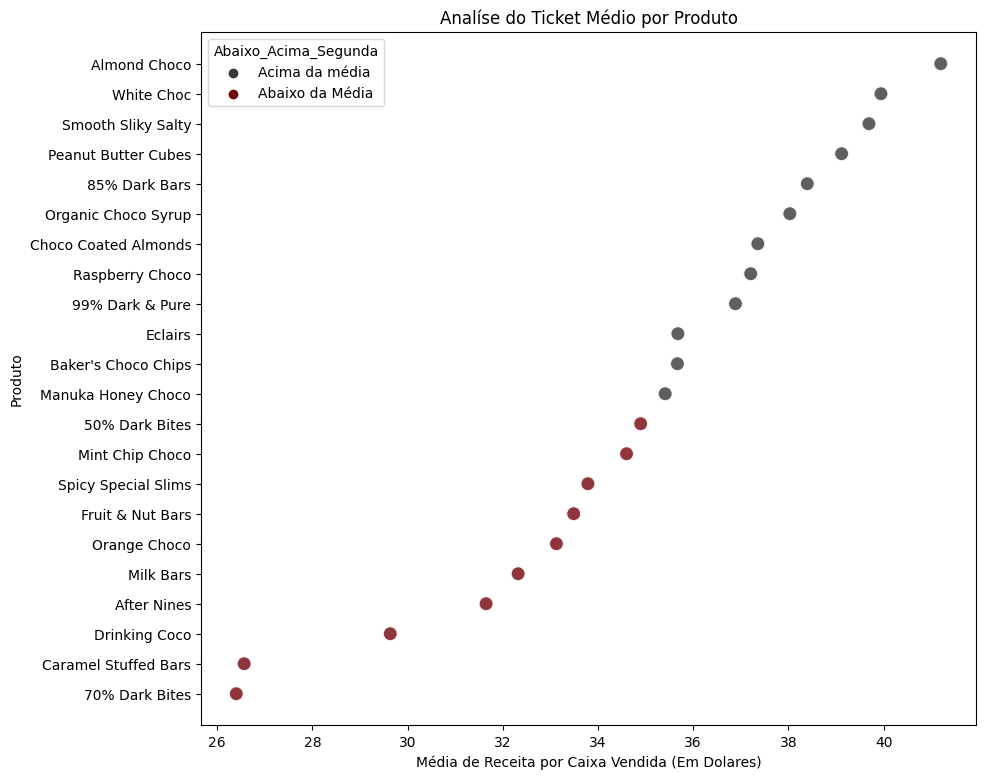

In [30]:
#Gráfico Ticket Médio por Produto
media_ticketmedio_produto = ticketmedio_produto['Valor_por_Caixa'].mean()
ticketmedio_produto['Abaixo_Acima_Segunda']=np.where(ticketmedio_produto['Valor_por_Caixa']>=media_ticketmedio_produto,
                                                             'Acima da média','Abaixo da Média')
#Configurando Gráfico
plt.figure(figsize=(10,9))
scatter = sns.scatterplot(
    data=ticketmedio_produto,
    x='Valor_por_Caixa',
    y='Product',
    hue='Abaixo_Acima_Segunda',
    palette={'Acima da média':'#363738','Abaixo da Média':'#73020a'},
    s=100,
     alpha=0.8
)
plt.title("Analíse do Ticket Médio por Produto")
plt.xlabel("Média de Receita por Caixa Vendida (Em Dolares)")
plt.ylabel("Produto")
plt.show()

## Analise do Ticket Médio por Produto
* Vemos que Almond Choco é o produto com o maior ticket médio, sendo assim um produto extremamente rentavel, o chocolate branco também é outro que merece destaque, uma vez que ele tem alta receita e também um alto ticket médio
* o 50% dark Bites tem a segunda maior receita, mas tem um ticket médio abaixo da média dos outros produtos, talvez seja necessario rever seu preço de venda para trazer rentabilidades maiores no futuro
* Os dois outliers sendo o Caramel Stuffed Bars e 70% Dark Bites, tem tanto receita quanto tickets médios destoantes dos outros produtos, talvez seja necessario adquirir mais dados referentes aos mesmos para ver se são produtos que incorrem em prejuízo ou não, bem como analisar as medidas que podem ser cabiveis para aumentar suas vendas e suas receitas, como procurar novos mercados, campanhas de marketing, alterações na formula etc.
* O resto dos outros chocolates tem comportamentos esperados aonde os com maiores receitas e acima da média da receita também possuem maiores ticket's médios e acima da média dos outros tickets médios

In [31]:
#Criando tabela agrupada com País e Produto por receita
Tabela_Produtos_Paises = df.groupby(['Country','Product'])['amount_float'].sum().reset_index()

In [32]:
# 5 produtos mais vendidos por país
top5_por_pais = (
    Tabela_Produtos_Paises
    .groupby('Country')
    .apply(lambda x: x.nlargest(5,'amount_float'))
    .reset_index(drop=True)
)
print(top5_por_pais)

        Country               Product  amount_float
0     Australia        50% Dark Bites       89222.0
1     Australia               Eclairs       64323.0
2     Australia             Milk Bars       61173.0
3     Australia   Spicy Special Slims       61005.0
4     Australia   Organic Choco Syrup       60445.0
5        Canada    Smooth Sliky Salty       68257.0
6        Canada   Peanut Butter Cubes       62181.0
7        Canada        70% Dark Bites       59024.0
8        Canada   Spicy Special Slims       58051.0
9        Canada  Choco Coated Almonds       57463.0
10        India               Eclairs       79009.0
11        India   Peanut Butter Cubes       76909.0
12        India    Smooth Sliky Salty       76041.0
13        India   Spicy Special Slims       75495.0
14        India       Mint Chip Choco       69153.0
15  New Zealand       Mint Chip Choco       86709.0
16  New Zealand         85% Dark Bars       67550.0
17  New Zealand               Eclairs       60319.0
18  New Zeal

/tmp/ipykernel_33/2883991198.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5,'amount_float'))


In [33]:
#Importanto ploty e criando um gráfico
import plotly.express as px
# Criação do Gráfico
fig = px.bar(
    top5_por_pais,
    x='Country',
    y='amount_float',
    color='Product',
    title="Os 5 Produtos mais vendidos por País",
    labels={'amount_float':"Receita Total",'Country': 'País','Product':'Produto'},
    barmode='stack',
)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


## Analise de Produto por País
No gráfico acimama podemos ver que os produtos mais consumidos por país.
Além disso, vemos produtos que tem uma recorrência de consumo alta em diversos países, tais como:
* Spice Special Slims
* Smooth Sliky Salty
* Peanut Butter Cubes
* Eclairs

Esses chocolates devido a sua popularidade em diversos países podem ter características que agradem diversos públicos, sendo assim valeria a pena uma pesquisa das principais características dos mesmos a fim de desenvolver produtos semelhantes.
Além disso, outros produtos que vendem muito em apenas um país deveriam ser investigados a fim de revelar possíveis preferências dos consumidores desses países.
Logo seria recomendável a coleta de mais dados para tais análises futuras.

# Analise de Vendas ao longo do tempo
* Analisar o evolutivo da receita por dia e por mês
* Analisar meses de altas e baixas de vendas

In [34]:
# Convertendo a coluna data para Data Time
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   object        
 5   Boxes Shipped  1094 non-null   int64         
 6   amount_float   1094 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 60.0+ KB


/tmp/ipykernel_33/3569525129.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [35]:
#Criando tabela com a evolução da receita Dia a Dia e Mês a Mês
Tabela_Evolutiva_Receita = df.groupby('Date')['amount_float'].sum().reset_index()
Tabela_Evolutiva_Receita['Mes']=Tabela_Evolutiva_Receita['Date'].dt.month
Tabela_Evolutiva_Receita_Mes = Tabela_Evolutiva_Receita.groupby('Mes')['amount_float'].sum().reset_index()
print(Tabela_Evolutiva_Receita)

          Date  amount_float  Mes
0   2022-01-03       40425.0    1
1   2022-01-04       77175.0    1
2   2022-01-05       29162.0    1
3   2022-01-07        8666.0    1
4   2022-01-10       51471.0    1
..         ...           ...  ...
163 2022-08-24       43400.0    8
164 2022-08-25       40341.0    8
165 2022-08-26       17556.0    8
166 2022-08-30       23072.0    8
167 2022-08-31        5614.0    8

[168 rows x 3 columns]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



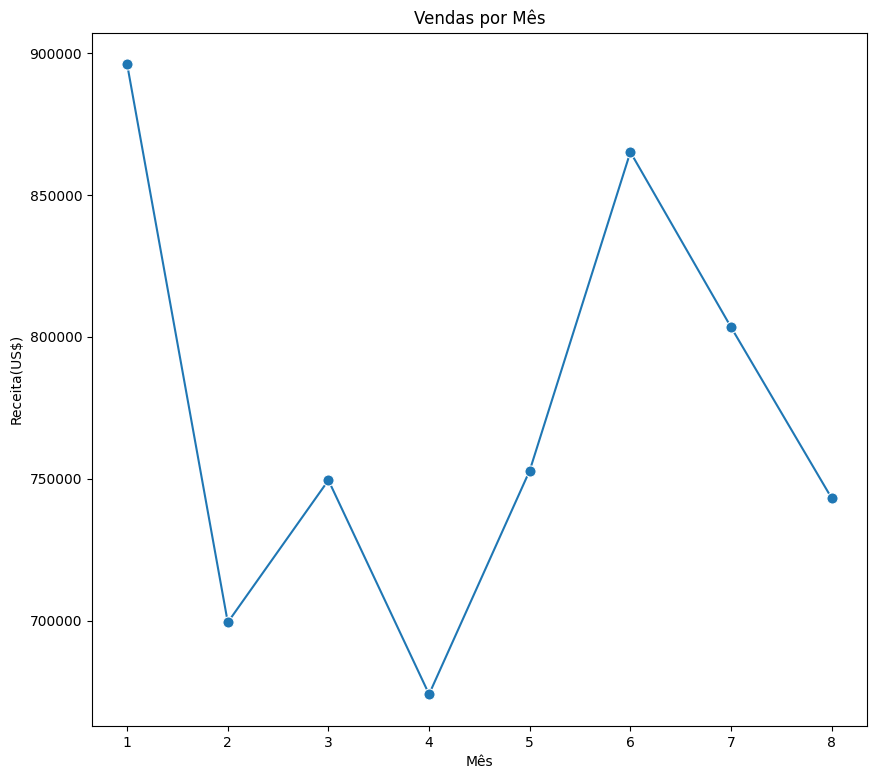

In [36]:
# Criação Gráfico Mês
plt.figure(figsize=(10,9))

line = sns.lineplot(
    data = Tabela_Evolutiva_Receita_Mes,
    x = 'Mes',
    y = 'amount_float',
    errorbar=None,
    marker ='o',
    markersize = 8)
plt.title('Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita(US$)')
plt.show()

## Vendas Totais por Mês
Podemos ver que o Mês de janeiro foi o mês que gerou a maior receita, com aproximadamente 900 mil dólares, contudo desde lá as vendas só foram chegar perto desse patamar no mês de junho com um pouco mais de 850 mil dólares.
Além disso, vemos que Mês a Mês possuímos uma certa oscilação, com os indicadores MoM apresentando variações positivas e negativas, bem como o mês com mais baixo volume de vendas foi o mês de abril. 

In [37]:
# Criando gráfico com ploty para acompanhamento Dia a Dia
fig = px.line(Tabela_Evolutiva_Receita, x = 'Date', y= 'amount_float')
fig.show()

## Análise de Vendas Dia a Dia
Este gráfico tem como missão um acompanhamento visual dia a dia, caso gerentes de vendas requisitassem

In [38]:
# Criando Gráfico por Mês das vendas dos Países
#Criação dos dataframes necessarios 
Tabela_Paises_Data = df.groupby(['Date','Country'])['amount_float'].sum().reset_index()
Tabela_Paises_Data['Mes'] = Tabela_Paises_Data['Date'].dt.month
Tabela_Paises_Mes = Tabela_Paises_Data.groupby(['Mes','Country'])['amount_float'].sum().reset_index()
#Gráfico
fig = px.line(Tabela_Paises_Mes, x = 'Mes', y= 'amount_float',color='Country')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Vendas Totais por Mês e Países
Neste gráfico podemos analisar as vendas por Mês e países de destino podemos tirar algumas ideias dele. Por exemplo, ao filtrarmos os países por continentes.
* Na Oceania (Austrália e Nova Zelândia) vemos que o mercado australiano é mais estável para a nossa empresa do que se comparado ao mercado neozelandês, aonde temos uma oscilação maior e vendas mais baixas no geral, contudo ambos os mercados seguem uma média de 100 mil dólares vendidos por mês
* Na America do Norte (EUA e Canada) vemos o cenário aonde o Canada é um país que tem meses de vendas maiores que o americano no geral, contudo durante os meses de março a abril o país importou menos dos produtos da empresa, sendo assim cabe avaliar motivos dessa queda. Já o mercado estadunidense, se mantém sem quedas bruscas nas vendas para um nível abaixo dos 100 mil dólares, evidenciando ser um mercado resiliente para busca de receita da empresa. Bem como um país importante na carteira de cliente
* Já na Europa (Reino Unido) e Ásia (Índia) vemos o seguinte cenário: o Reino Unido, tem um histórico de receita baixo para a empresa, porém ele apresenta picos em alguns momentos, contudo suas receitas no geral giram em torno entre 95 mil a 105 mil dólares. Contudo, o mercado indiano vem apresentando um crescimento de receitas consistente, evidenciando que conseguimos adentrar em um dos maiores mercados consumidores da Ásia.
* Sendo assim, Oceania e America do Norte são os principais mercados, contudo Índia tem projeção de crescimento nas receitas para a empresa com se exportando cada vez mais para o país. Já o Reino Unido, tem períodos de picos de vendas, porém esses picos não se mantém por muito tempo, talvez coubesse desenvolver produtos que visam mais diretamente o país. 